## Time Series Forecasting by using ARIMA/SARIMA model


In [1]:

import pandas as pd
# import sys  
# sys.path.insert(0, '../python/')

# import file
# !ln -s ../python/plot_helper.py plot_helper.py
#from plot_helper import plotting

#!ln -s ../python/data_format.py data_format1.py
#from data_format1 import data_format

# d=data_format()
# p=plotting()
file='../Timing Analysis/ad_Aug1_advertiser_time.csv'
df=pd.read_csv(file)

df=df.drop(['Unnamed: 0','campaign_name', 'adset_name', 'ad_name','inline_link_click_ctr', 'inline_post_engagement',
       'instant_experience_clicks_to_open',
       'instant_experience_clicks_to_start',
       'instant_experience_outbound_clicks', 'interactive_component_tap_value',
       'objective', 'outbound_clicks_outbound_click',
       'outbound_clicks_ctr_outbound_click','updated_time','website_ctr_link_click'],axis=1)



In [2]:
df=df.rename(columns={'cost_per_action_type_video_view':'cpa_video_view'})
df=df.rename(columns={'cost_per_action_type_link_click':'cpa_link_click'})
df=df.rename(columns={'cost_per_action_type_onsite_conversion.post_save':'cpa_on_conv'})
df=df.rename(columns={'cost_per_action_type_omni_activate_app':'cpa_all_act_app'})
df=df.rename(columns={'cost_per_action_type_post_engagement':'cpa_post_eng'})
df=df.rename(columns={'cost_per_action_type_page_engagement':'cpa_pg_eng'})
df=df.rename(columns={'cost_per_action_type_omni_app_install':'cpa_all_app_install'})
df=df.rename(columns={'cost_per_inline_link_click':'cpinl_link_click'})
df=df.rename(columns={'cost_per_inline_post_engagement':'cpinl_post_eng'})
df=df.rename(columns={'cost_per_outbound_click_outbound_click':'cpo_click'})
df=df.rename(columns={'hourly_stats_aggregated_by_advertiser_time_zone':'time'})
#data1['conversions']=df1.unique_actions_mobile_app_install

# #data1['CR']=round((data1.conversions/data1.clicks) *100, 2)
df['CTR']=round((df.clicks / df.impressions) * 100,4)
df['CPC']= round(df.spend / df.clicks,2)
# #data1['costPerCon'] = round(data1.spend / data1.conversions, 2)
df['CPM'] = round((df.spend / df.impressions) * 1000, 2)

df.head()

,campaign_id,adset_id,ad_id,clicks,cpa_link_click,cpa_on_conv,cpa_all_act_app,cpa_post_eng,cpa_pg_eng,cpa_all_app_install,...,cpo_click,impressions,spend,date_start,date_stop,time,cpa_video_view,CTR,CPC,CPM
0,23845309179470180,23845309179490180,23845309179510180,168,0.251964,42.33,0.084155,0.246105,0.246105,0.419109,...,0.251964,4083,42.33,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,4.1146,0.25,10.37
1,23845314022210180,23845314039500180,23845314039460180,0,NaN,0.42,NaN,0.035000,0.035000,NaN,...,NaN,45,0.42,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.038182,0.0000,inf,9.33
2,23845314022210180,23845314039500180,23845314039480180,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6,0.03,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,0.0000,inf,5.00
3,23845314022210180,23845314039500180,23845314039510180,0,NaN,NaN,NaN,0.073333,0.073333,NaN,...,NaN,38,0.22,2020-08-01,2020-08-15,00:00:00 - 00:59:59,0.073333,0.0000,inf,5.79
4,23845314118080180,23845314118190180,23845314118100180,1,0.080000,NaN,NaN,0.080000,0.080000,NaN,...,0.080000,7,0.08,2020-08-01,2020-08-15,00:00:00 - 00:59:59,NaN,14.2857,0.08,11.43


In [3]:
df.time=df.time.replace('00:00:00 - 00:59:59',1)
df.time=df.time.replace('01:00:00 - 01:59:59',2)
df.time=df.time.replace('02:00:00 - 02:59:59',3)
df.time=df.time.replace('03:00:00 - 03:59:59',4)
df.time=df.time.replace('04:00:00 - 04:59:59',5)
df.time=df.time.replace('05:00:00 - 05:59:59',6)
df.time=df.time.replace('06:00:00 - 06:59:59',7)
df.time=df.time.replace('07:00:00 - 07:59:59',8)
df.time=df.time.replace('08:00:00 - 08:59:59',9)
df.time=df.time.replace('09:00:00 - 09:59:59',10)
df.time=df.time.replace('10:00:00 - 10:59:59',11)
df.time=df.time.replace('11:00:00 - 11:59:59',12)
df.time=df.time.replace('12:00:00 - 12:59:59',13)
df.time=df.time.replace('13:00:00 - 13:59:59',14)
df.time=df.time.replace('14:00:00 - 14:59:59',15)
df.time=df.time.replace('15:00:00 - 15:59:59',16)
df.time=df.time.replace('16:00:00 - 16:59:59',17)
df.time=df.time.replace('17:00:00 - 17:59:59',18)
df.time=df.time.replace('18:00:00 - 18:59:59',19)
df.time=df.time.replace('19:00:00 - 19:59:59',20)
df.time=df.time.replace('20:00:00 - 20:59:59',21)
df.time=df.time.replace('21:00:00 - 21:59:59',22)
df.time=df.time.replace('22:00:00 - 22:59:59',23)
df.time=df.time.replace('23:00:00 - 23:59:59',24)

### Visualising the time series

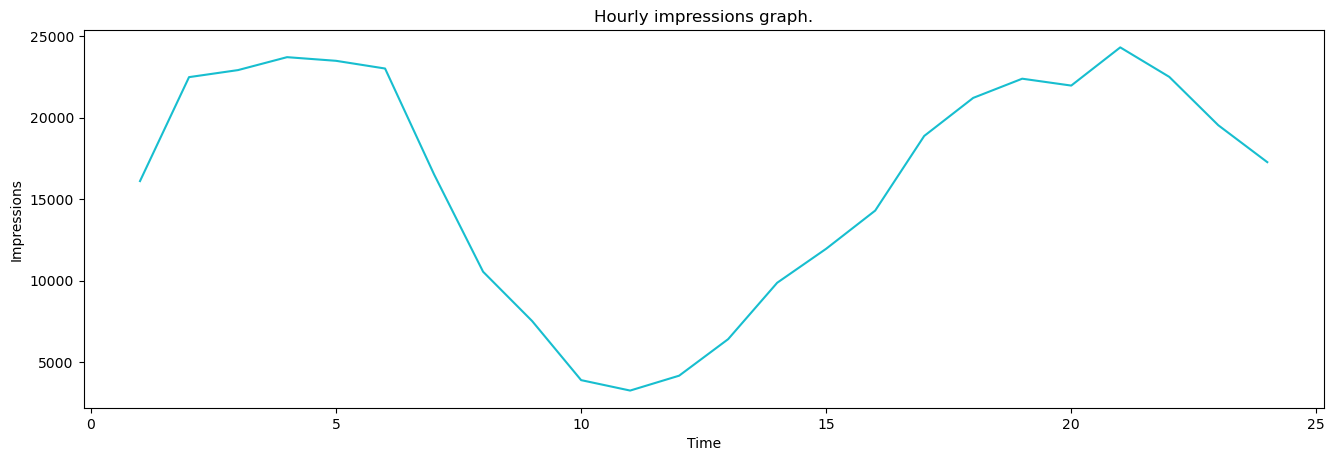

In [4]:
# Time series data source: fpp pacakge in R.
import matplotlib.pyplot as plt
grouped = pd.DataFrame(df.groupby(['time','date_start'])['impressions'].sum().reset_index())

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Time', ylabel='Impressions', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:cyan')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(grouped, x=grouped.time, y=grouped.impressions, title='Hourly impressions graph.')    

In [5]:
grouped

,time,date_start,impressions
0,1.0,2020-08-01,16101
1,2.0,2020-08-01,22477
2,3.0,2020-08-01,22909
3,4.0,2020-08-01,23702
4,5.0,2020-08-01,23478
5,6.0,2020-08-01,23005
6,7.0,2020-08-01,16510
7,8.0,2020-08-01,10540
8,9.0,2020-08-01,7517
9,10.0,2020-08-01,3891


### Decompose a time series into its componets

In [6]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# from dateutil.parser import parse

# #grouped =grouped.sort_index(inplace=True)
# # Multiplicative Decomposition 
# result_mul = seasonal_decompose(grouped['time'], model='multiplicative', extrapolate_trend=None)

# # Additive Decomposition
# result_add = seasonal_decompose(grouped['time'], model='additive', extrapolate_trend=0)

# # Plot
# plt.rcParams.update({'figure.figsize': (10,10)})
# result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
# result_add.plot().suptitle('Additive Decompose', fontsize=22)
# plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


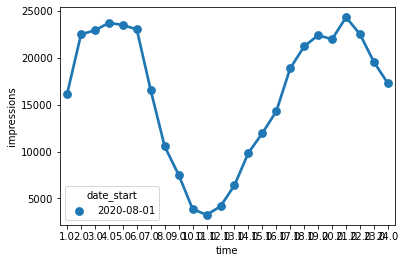

In [7]:
# the analysis should be by date not time but ok 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

grouped = pd.DataFrame(df.groupby(['time','date_start'])['impressions'].sum().reset_index())
sns.pointplot(x='time', y='impressions', hue='date_start', data=grouped)

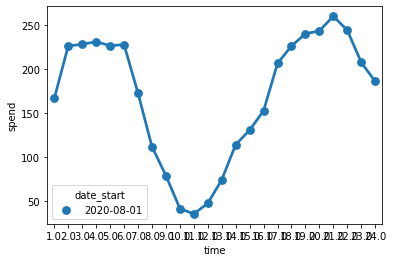

In [8]:
grouped = pd.DataFrame(df.groupby(['time','date_start'])['spend'].sum().reset_index())
sns.pointplot(x='time', y='spend', hue='date_start', data=grouped)

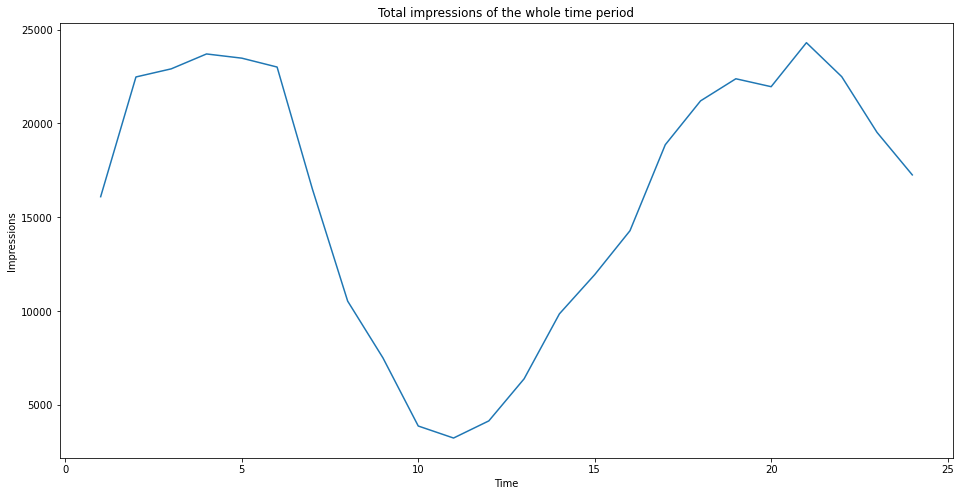

In [9]:
ts=df.groupby(["time"])["impressions"].sum()
ts.astype('float')
plt.figure(figsize=(16,8))
plt.title('Total impressions of the whole time period')
plt.xlabel('Time')
plt.ylabel('Impressions')
plt.plot(ts);

In [10]:
df1 = pd.DataFrame(df.groupby(['time'])['impressions'].sum().reset_index())

count       24.000000
mean     16168.708333
std       7193.943385
min       3251.000000
25%      10370.750000
50%      18065.000000
75%      22481.000000
max      24302.000000
Name: impressions, dtype: float64

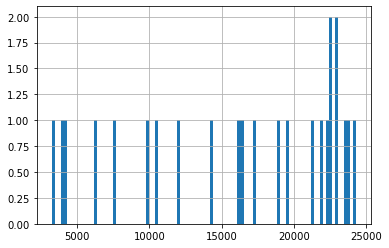

In [11]:
df1.impressions.hist(bins=100)
df1.impressions.describe()

### Check the stasionarity

In [12]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.impressions.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.938476
p-value: 0.314183


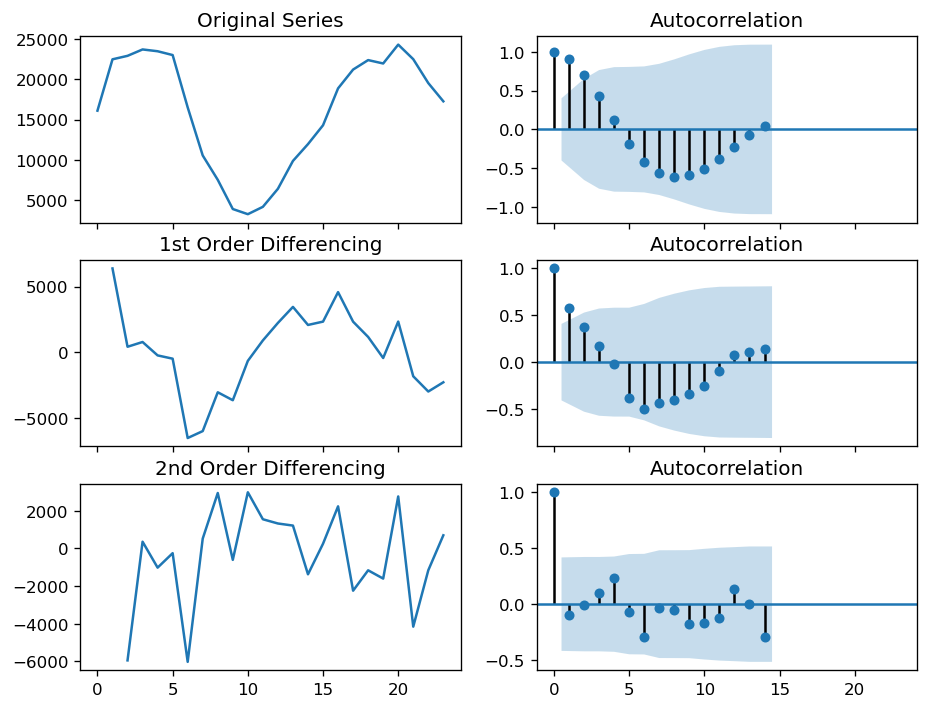

In [13]:
# Since P-value is greater than the significance level, 
#let’s difference the series and see how the autocorrelation plot looks like.

import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.impressions); axes[0, 0].set_title('Original Series')
plot_acf(df1.impressions, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1.impressions.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.impressions.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.impressions.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.impressions.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [14]:
# For the above series, the time series reaches stationarity with two orders of differencing.
# so d=2

#testing the stationarity now with the 2nd diff
result1 = adfuller(df1.impressions.diff(2).dropna())
print('ADF Statistic: %f' % result1[0])
print('p-value: %f' % result1[1])

ADF Statistic: -2.261632
p-value: 0.184641


/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


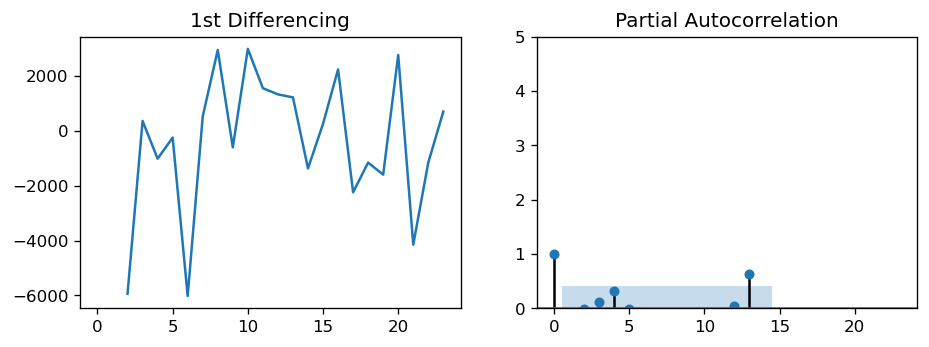

In [15]:
#Find the order of the p term
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.impressions.diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1.impressions.diff().diff().dropna(), ax=axes[1])

plt.show()

#p=2 since the value in the second plot it is inside the significance level (blue area) 

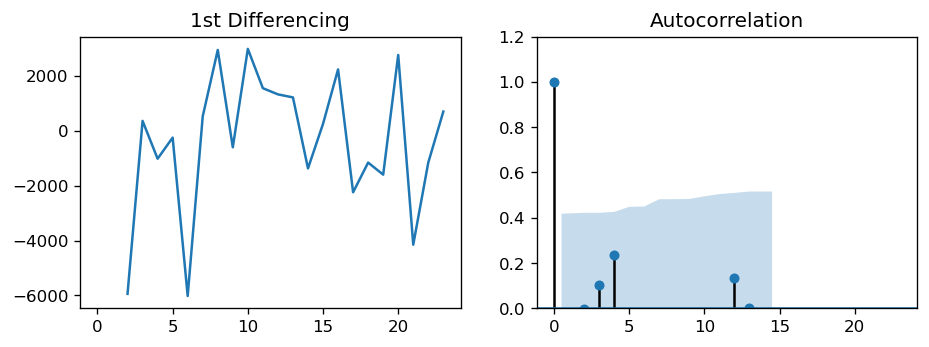

In [16]:
#How to find the q term

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.impressions.diff().diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1.impressions.diff().diff().dropna(), ax=axes[1])

plt.show()
#so q=2

In [22]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df1.impressions, order=(2,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D2.impressions   No. Observations:                   22
Model:                 ARIMA(2, 2, 1)   Log Likelihood                -202.869
Method:                       css-mle   S.D. of innovations           2402.793
Date:                Wed, 13 Jan 2021   AIC                            415.738
Time:                        15:28:15   BIC                            421.193
Sample:                             2   HQIC                           417.023
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -376.0512    465.635     -0.808      0.430   -1288.679     536.576
ar.L1.D2.impressions    -1.0681      0.237     -4.507      0.000      -1.533      -0.604
ar.L2.D2.imp

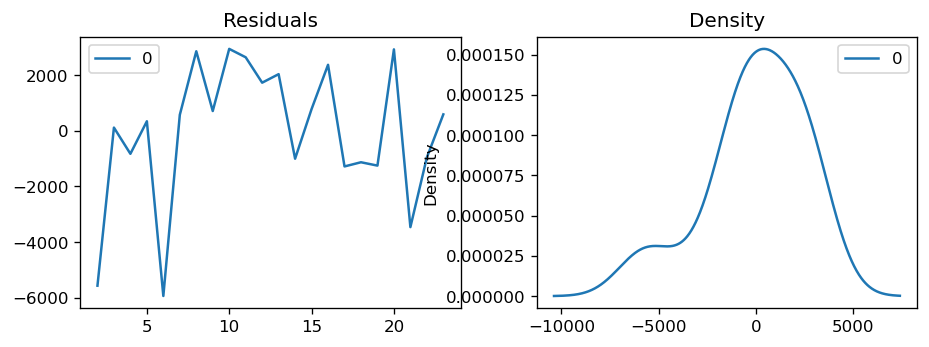

In [23]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

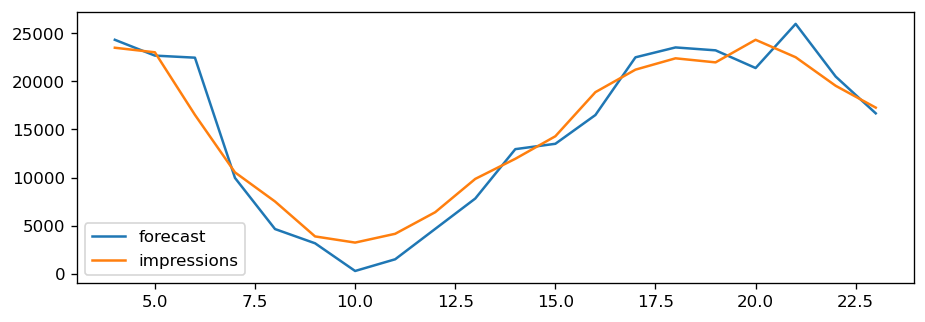

In [24]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## Out of time cross validation 

In [43]:
from statsmodels.tsa.stattools import acf
#We need to split the data in train and test samples where we use the test sample to check the forecasting
# Create Training and Test
train = df1.impressions[:22]
test = df1.impressions[22:]
len(test)

2

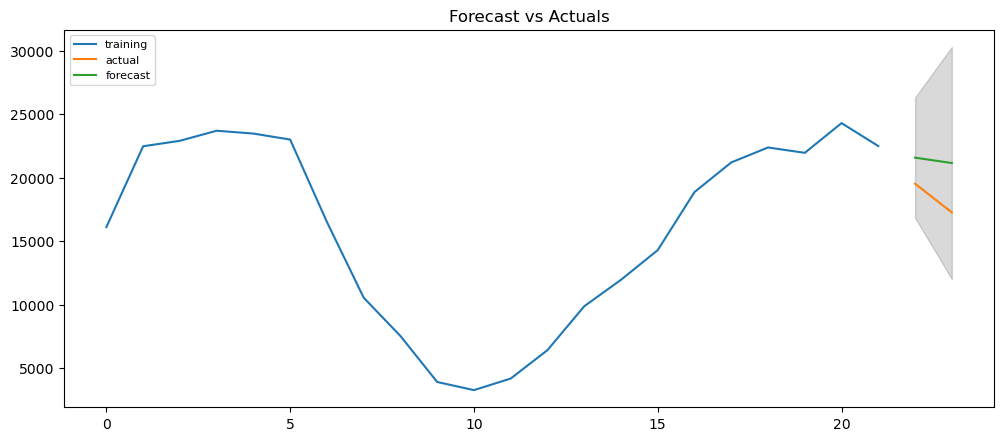

In [44]:
# Build Model
model = ARIMA(train, order=(1, 1, 1)) 

fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(2, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()